# Luggage Bags Cost Prediction

In [280]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [281]:
dataset = pd.read_csv(r"Data_miniproject.csv")

In [282]:
dataset.head(5)

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [283]:
dataset.tail(5)

,Cost,Weight,Weight1,Length,Height,Width
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672
158,19.9,13.8,15.0,16.2,2.9322,1.8792


## Exploratory Data Analysis

###### Checking datatypes. All of them are numeric. No need of data formatting

In [284]:
dataset.dtypes

Cost       float64
Weight     float64
Weight1    float64
Length     float64
Height     float64
Width      float64
dtype: object

In [285]:
dataset.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [286]:
dataset.shape

(159, 6)

### Check for duplicate rows and remove if any. The dataset has 0 duplicate rows.

In [287]:
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 6)


### Check for Null/Missing values and remove. The dataset has no null values

In [1]:
print(dataset.isnull().sum())

NameError: name 'dataset' is not defined

### Checking frequency distribution of all features and target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170058FAEC8>,
      dtype=object)

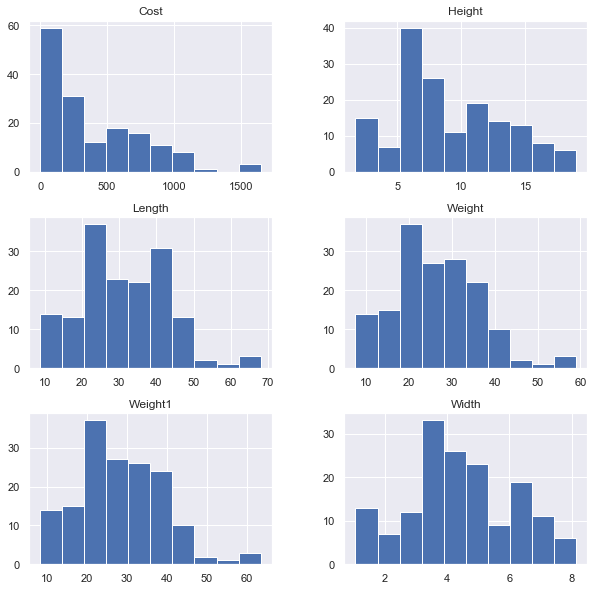

In [289]:
dataset.hist(figsize=(10,10))

### Detecting outliers

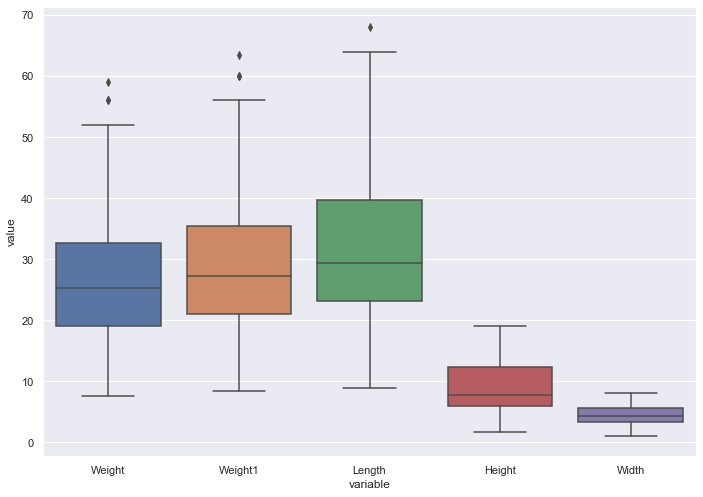

In [290]:
melted_df = pd.melt(dataset.drop('Cost',axis=1))
sns.boxplot(x="variable", y="value", data=melted_df)

In [291]:
dataset[(dataset['Weight']>=55) & (dataset['Length']>=64)]

,Cost,Weight,Weight1,Length,Height,Width
142,1600.0,56.0,60.0,64.0,9.600,6.144
143,1550.0,56.0,60.0,64.0,9.600,6.144
144,1650.0,59.0,63.4,68.0,10.812,7.480


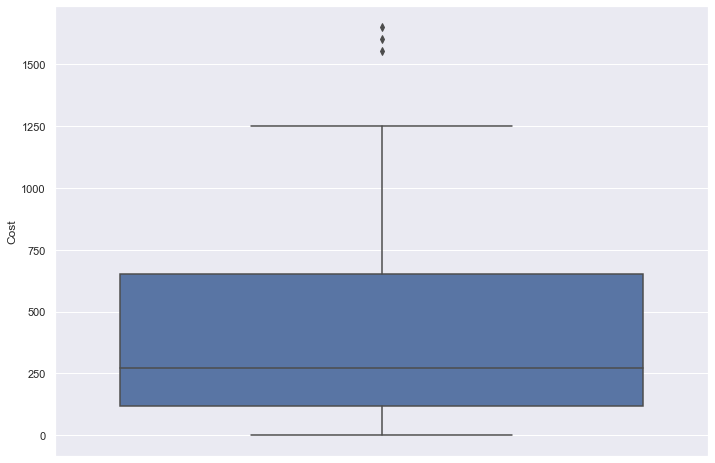

In [292]:
sns.boxplot(y=dataset['Cost'])

In [293]:
dataset[(dataset['Cost']>=1500)]

,Cost,Weight,Weight1,Length,Height,Width
142,1600.0,56.0,60.0,64.0,9.600,6.144
143,1550.0,56.0,60.0,64.0,9.600,6.144
144,1650.0,59.0,63.4,68.0,10.812,7.480


### Removing Outliers

In [294]:
# Removing outliers when Cost>1500 (same records are outliers for Weight and Length)
dataset.drop(dataset[(dataset['Cost']>=1500)].index, inplace=True)
dataset.shape

(156, 6)

In [295]:
#Checking for 0 Cost record
dataset[dataset['Cost']==0]

,Cost,Weight,Weight1,Length,Height,Width
40,0.0,19.0,20.5,22.8,6.4752,3.3516


In [296]:
#Removing 0 Cost record
dataset.drop(dataset[dataset['Cost']==0].index, inplace=True)
dataset.shape

(155, 6)

### Heat map to check correlation between features

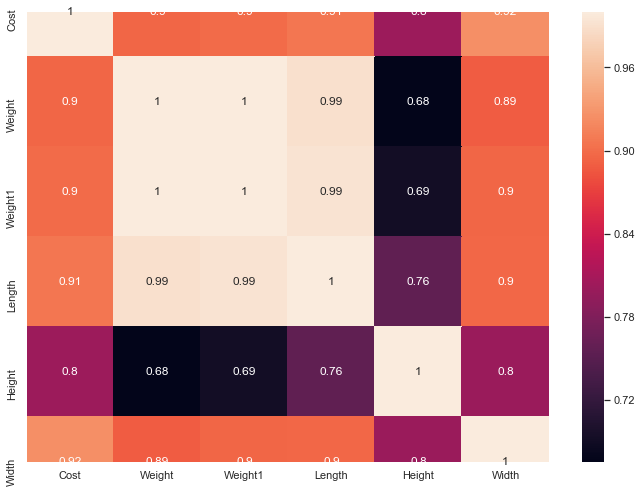

In [297]:
#plt.figure(figsize=(15,5))
c= dataset.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)
c
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(c, xticklabels=c.columns, yticklabels=c.columns, annot=True)


### Insights from HeatMap
#1. Weight and Weight1 are correlated by 1. Can drop one of two features.
#2. Length is correlated to weight and weight1 0.99. Still keeping length, since not many features are present.


### Scatter plots of all features

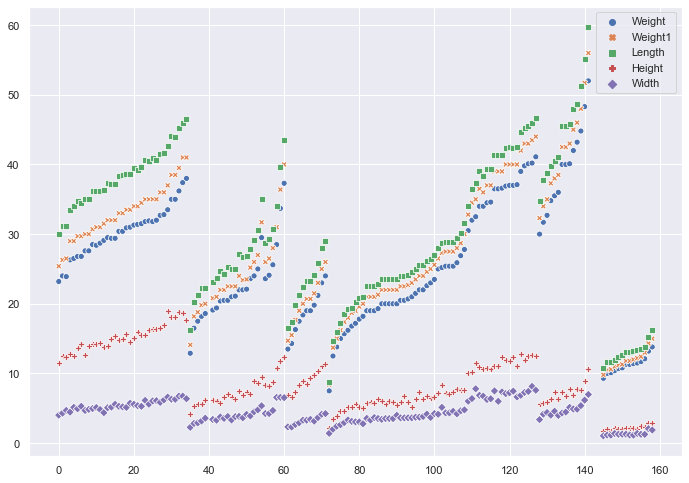

In [298]:
#sns.scatterplot(dataset['Weight'],dataset['Cost'])
sns.scatterplot(data=dataset.drop('Cost', axis=1))


In [299]:
## Since weight and weight 1 has higher co-relation dropping 1 column
dataset.drop('Weight1', axis=1,inplace=True)
dataset.head(3)

,Cost,Weight,Length,Height,Width
0,242.0,23.2,30.0,11.5200,4.0200
1,290.0,24.0,31.2,12.4800,4.3056
2,340.0,23.9,31.1,12.3778,4.6961


### Scatter plots of all features and target agaist each other

#First row of 5 plots show how Cost is related to each feature.
#Weight, Length, Height and Width appear to vary against Cost almost linearly
#Will go with model ==> Cost = T0 * Weight + T1 * Length + T2 * Height + T3 * Width

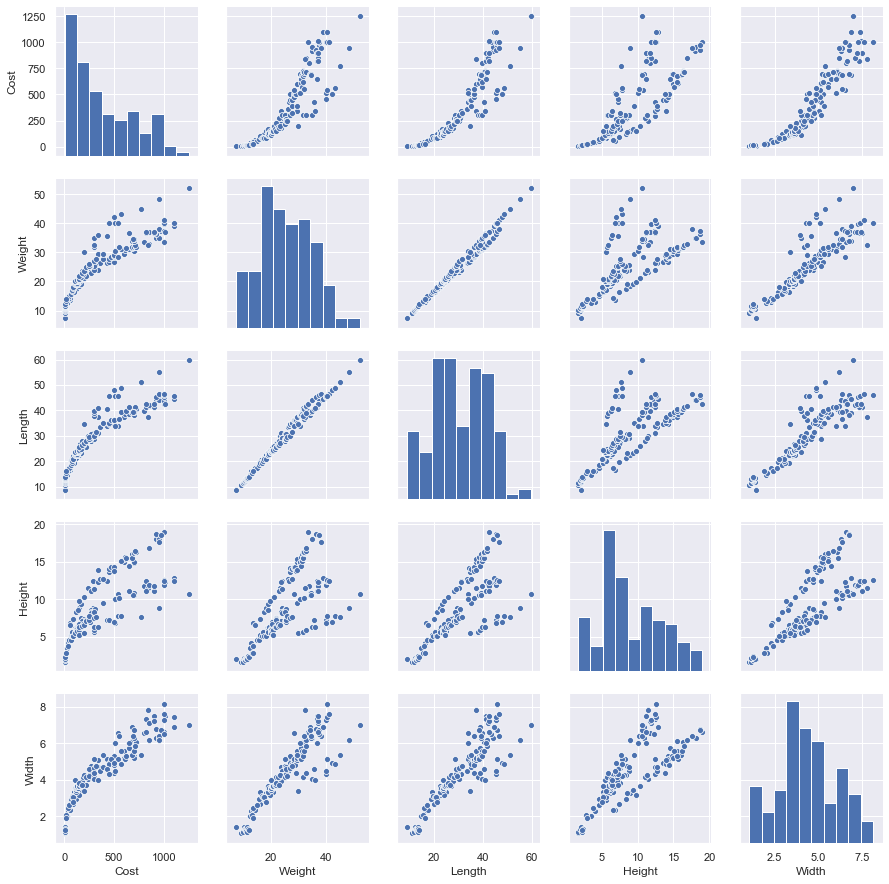

In [300]:
sns.pairplot(dataset)
plt.show()

### Feature Scaling

In [301]:
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(dataset.iloc[:,1:])
dataset.iloc[:,1:] = minmax_scale.transform(dataset.iloc[:,1:])

In [302]:
dataset.head(3)


,Cost,Weight,Length,Height,Width
0,242.0,0.352809,0.416503,0.568334,0.418978
1,290.0,0.370787,0.440079,0.624055,0.459235
2,340.0,0.368539,0.438114,0.618123,0.514279


### Buidling Models

In [303]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0:1].values

In [304]:
# Splitting the dataset by train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [305]:
learning_rate = 0.5
max_iteration = 5000

s_learning_rate = 0.05
s_max_iteration = 1000

mb_learning_rate = 0.05
mb_max_iteration = 10000
batch_size = 30

In [306]:
theta = np.zeros((dataset.shape[1], 1))
s_theta = np.zeros((dataset.shape[1], 1))
mb_theta = np.zeros((dataset.shape[1], 1))

In [307]:
# to calculate the metrics like MAE, MSE, RMSE, R2
def get_metrics(x, y, theta):
    y_pred = [(theta[1] * x1) + (theta[2] * x2)+ (theta[3] * x3)+ (theta[4] * x4) + theta[0]
                   for x1,x2,x3,x4 in x]
    mae = mean_absolute_error(y,y_pred)
    mse = mean_squared_error(y,y_pred)
    metrics = "MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(mae, mse, math.sqrt(mse), r2_score(y,y_pred))
    return metrics


In [308]:
# hypotheseis function to calculate the equation
def h (theta, X) :
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:,1:] = X
    res = np.matmul(tempX, theta)
    return res

In [309]:
# loss function to find the difference between actual and predicted values
def loss (theta, X, Y) :
    return np.average(np.square(Y - h(theta, X))) / 2

In [310]:
def gradient(theta, X, Y) :
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:,1:] = X
    d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
    d_theta = d_theta.reshape((d_theta.shape[0], 1))
    return d_theta

In [311]:
# Gradient or Batch function to calculate the gradient for the whole dataset
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap):
    cost = np.zeros(max_iteration)
    for i in range(max_iteration):
        d_theta = gradient (theta, X, Y)
        theta = theta - learning_rate * d_theta
        cost[i] = loss(theta, X, Y)
        if i % gap == 0 :
            print ('iteration : ', i, ' loss : ', loss(theta, X, Y))
    return theta, cost

In [312]:
# Mini Batch Gradient Function to calculate the gradient by splitting the dataset by multiple batches
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap):
    cost = np.zeros(max_iteration)
    for i in range(max_iteration) :
        for j in range(0, X.shape[0], batch_size):
            d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
            theta = theta - learning_rate * d_theta
        cost[i] = loss(theta, X, Y)
        if i % gap == 0 :
            print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
    return theta, cost

# Gradient Descent

In [313]:
theta, cost = gradient_descent (theta, X_train, y_train, learning_rate, max_iteration, 1000)
print(theta)

iteration :  0  loss :  26364.987603797243
iteration :  1000  loss :  5541.4662977201015
iteration :  2000  loss :  5505.84837946794
iteration :  3000  loss :  5473.473689300618
iteration :  4000  loss :  5443.5531818082145
[[-229.9994408 ]
 [ 761.34306267]
 [-173.39187163]
 [ 245.89992761]
 [ 561.87727464]]


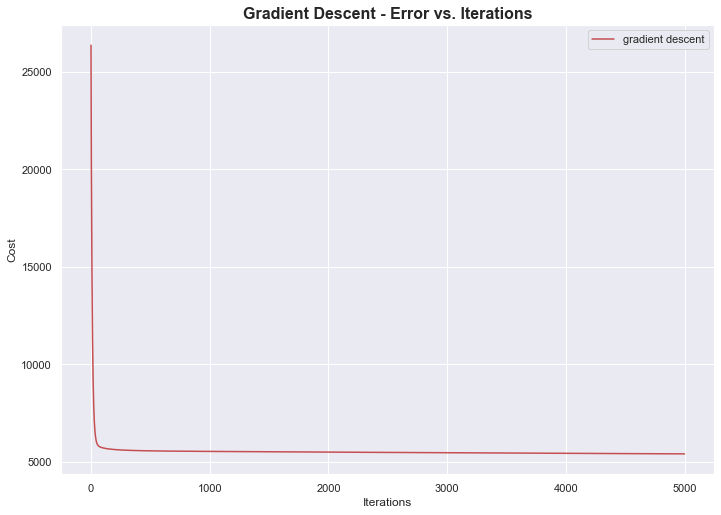

In [314]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Gradient Descent - Error vs. Iterations', fontsize=16, fontweight='bold')
plt.show()

In [315]:
print('Gradient Descent')
print(get_metrics(X_train,y_train,theta ))
print(get_metrics(X_test,y_test,theta ))

Gradient Descent
MAE = 87.45329837987487, MSE = 10831.85165626583, RMSE = 104.07618198351547, R2 = 0.8888219206093372
MAE = 76.10499646085337, MSE = 9547.39801569236, RMSE = 97.71078761166733, R2 = 0.9134654293551152


# Mini Batch Gradient Descent

In [316]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X_train, y_train,mb_learning_rate, mb_max_iteration, batch_size, 1000)
print(theta)

iteration :  0  loss :  68354.2580879257
iteration :  1000  loss :  5586.660219804213
iteration :  2000  loss :  5552.991697976656
iteration :  3000  loss :  5536.247254202887
iteration :  4000  loss :  5521.712915263156
iteration :  5000  loss :  5507.841554197212
iteration :  6000  loss :  5494.436816797164
iteration :  7000  loss :  5481.458012434699
iteration :  8000  loss :  5468.886579119911
iteration :  9000  loss :  5456.708450842257
[[-229.9994408 ]
 [ 761.34306267]
 [-173.39187163]
 [ 245.89992761]
 [ 561.87727464]]


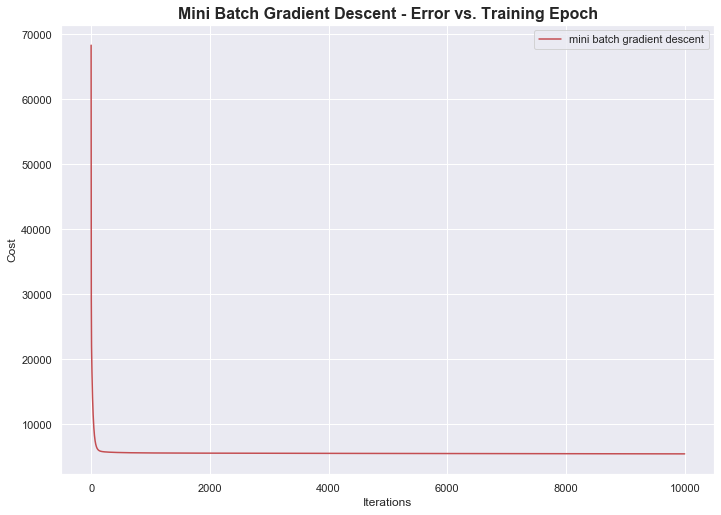

In [317]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(mb_max_iteration), mb_cost, 'r')  
ax.legend(loc='upper right', labels=['mini batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Mini Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

In [318]:
print('Mini Batch Gradient Descent')
print(get_metrics(X_train,y_train,mb_theta ))
print(get_metrics(X_test,y_test,mb_theta ))

Mini Batch Gradient Descent
MAE = 87.49437318195238, MSE = 10889.845156162257, RMSE = 104.35442087502693, R2 = 0.8882266755727327
MAE = 76.43450338826833, MSE = 9684.532392638783, RMSE = 98.41002180997006, R2 = 0.9122224870989939


# Stochastic Gradient Descent

In [319]:
sgd_regressor = SGDRegressor(max_iter=10000, tol=0.005)
sgd_regressor.fit(X_train, y_train.ravel())
print(sgd_regressor.coef_)
print(sgd_regressor.intercept_)

y_pred = sgd_regressor.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print('sklearn SGDRegressor')
print("MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(MAE, MSE, math.sqrt(MSE), sgd_regressor.score(X_train, y_train)))

[356.1040126  321.8912422  254.73204517 453.79414268]
[-229.09625895]
sklearn SGDRegressor
MAE = 75.12236685298787, MSE = 9468.299801366446, RMSE = 97.3051889745169, R2 = 0.8830230648357462


# Linear Regression

In [320]:
regr = LinearRegression()
regr.fit(X_train, y_train.ravel())
print(regr.coef_)
print('Intercept: \n', regr.intercept_)

y_pred = regr.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print('sklearn linear regression')
print("MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(MAE, MSE, math.sqrt(MSE), regr.score(X_train, y_train)))

[ 2804.72280515 -2225.60425605   599.21320629   327.27056093]
Intercept: 
 -221.98573428801478
sklearn linear regression
MAE = 74.94565526366674, MSE = 8917.262231716757, RMSE = 94.43125664586253, R2 = 0.8957486105903951


In [321]:
print("Mini Project of Luggage Bag Cost Prediction in Regression Completed")

Mini Project of Luggage Bag Cost Prediction in Regression Completed
